# Vidžeti

Osnovne funkcionalnosti Jupyter okruženja mogu se proširiti takozvanim vidžetima, komonentama koje integrišu fragmente JavaScript i HTML koda u Jupyter sveske. Da bi vidžeti mogli da se koriste, potrebno je instalirati paket `ipywidgets` komandom `conda install -c conda-forge ipywidgets`. U nastavku ćemo videti kako se vidžeti poput padajućih listi, radio dugmića i polja za štrikliranje mogu iskoristiti za interaktivni prikaz grafikona i sistematičnije pretraživanje podataka.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from ipywidgets import widgets, interactive

In [3]:
from IPython.display import display

## Komponente za kreiranje formulara

Postoje mnogobrojne komponente koje se mogu iskoristiti za kreiranje interaktivnih formulara. Neke od njih upoznaćemo u primeru koji sledi u kojem ćemo prikazati grafik odabrane funkcije u granicama odabrane ekvidistantne mreže.

Za odabir granica intervala iskoristićemo komponentu `FloatSlider`. Slajderu se preko argumenata `min` i `max` mogu zadati leva i desna granica opsega vrednosti, preko argumenta `value` početna vrednost, a preko argumenta `step` korak promene vrednosti. Preko argumenta `description` se zadaje labela koja treba da prati kreirane komponente. U slučaju slajdera, postoje argumenti kao što su `readout`, `readout_format`, `orientation` i `disabled` koji utiču, redom, na pojavljivanje i format vrednosti pored slajdera tj. sam način prikaza slajdera.

Za prikaz komponenti koristićemo funkciju `display`.

In [4]:
start_point = widgets.FloatSlider(min=-5 * np.pi,
                                  max=5 * np.pi,
                                  value=0,
                                  step=0.1,
                                  description='Početak: ')

In [5]:
display(start_point)

FloatSlider(value=0.0, description='Početak: ', max=15.707963267948966, min=-15.707963267948966)

In [6]:
end_point = widgets.FloatSlider(min=-5 * np.pi,
                                max=5 * np.pi,
                                value=5 * np.pi,
                                step=0.1,
                                description='Kraj: ')

In [7]:
display(end_point)

FloatSlider(value=15.707963267948966, description='Kraj: ', max=15.707963267948966, min=-15.707963267948966)

Izbor funkcije za prikaz omogućićemo kroz seriju radio dugmića. Njih možemo kreirati korišćenjem komponente `RadioButtons`. Opcije za izbor se mogu zadati preko argumenta `options`, a podrazumevana vrednost preko argumenta `value`. Ukoliko se kao vrednost argumenta `options` navede lista, elementi liste će se iskoristiti i kao obeležja i kao vrednosti opcija. Moguće je navesti i listu parova tako da se prvi element para koristi kao obeležje, a drugi kao vrednost. 

In [8]:
function_to_plot = widgets.RadioButtons(options=['sin', 'cos'],
                                        value='sin',
                                        description='Funkcija: ')

In [9]:
display(function_to_plot)

RadioButtons(description='Funkcija: ', options=('sin', 'cos'), value='sin')

Izbor broja tačaka intervala za iscrtavanje grafika funkcije omogućićemo padajućom listom. Nju možemo kreirati korišćenjem komponente `Dropdown`. Baš kao i kod radio dugmića, opcije se mogu zadati argumentom `options`, a početna vrednost argumentom `value`.

In [10]:
number_of_points = widgets.Dropdown(options=[10, 30, 50],
                                    value=30,
                                    description='Broj tačaka: ')

In [11]:
display(number_of_points)

Dropdown(description='Broj tačaka: ', index=1, options=(10, 30, 50), value=30)

Dugmad se mogu kreirati korišćenjem komponente `Button`. Labela koja se zadaje argumentom `description` će se sada pojaviti kao tekst na dugmetu, a korišćenjem argumenata `button_style` i `icon` se može izvršiti bazično stilizovanje dugmeta. Dodatno, argumentom `tooltip` se može potpunije približiti funkcionalnost dugmeta. Dugme se može deaktivirati korišćenjem svojstva `disabled` sa vrednošću `True`.

In [12]:
button = widgets.Button(description='Prikaži grafik',
                        disabled=False,
                        button_style='success',
                        tooltip='Potvrdi')

In [13]:
display(button)

Button(button_style='success', description='Prikaži grafik', style=ButtonStyle(), tooltip='Potvrdi')

Funkcija koja treba da se izvrši kada se klikne na dugme pridružuje se događajem `on_click`. U našem slučaju, to će biti funkcija `show_plot`. Očekuje se da argument ove funkcije bude objekat koji predstavlja samo dugme. Unutar funkcije ćemo očitati vrednosti odabranih kontrola korišćenjem njihovog svojstva `value`, a zatim i pripremiti podatke i prikazati grafik funkcije.

In [14]:
def show_plot(button):
    start = start_point.value
    end = end_point.value
    if start > end:
        print('Proverite granice intervala!')
        return

    N = int(number_of_points.value)
    x = np.linspace(start, end, N)

    if function_to_plot.value == 'sin':
        y = np.sin(x)
    else:
        y = np.cos(x)

    plt.clf()
    plt.plot(x, y)
    plt.title(function_to_plot.value)

In [15]:
button.on_click(show_plot)

Sve komponente zajedički možemo prikazati korišćenjem funkcije `display`. Pre toga ih, opciono, možemo vertikalno urediti korišćenjem komponente `VBox`. Horizontalno uređenje je moguće korišćenjem komponente `HBox`. Na raspolaganju su mnogobrojne komponente kojima se može preciznije uticati na raspored i prikaz elemenata. Neke od njih su `GridBox`, `Accordion`, `Tabs` i drugi. 

In [16]:
form = widgets.VBox([start_point, end_point, function_to_plot, number_of_points, button])

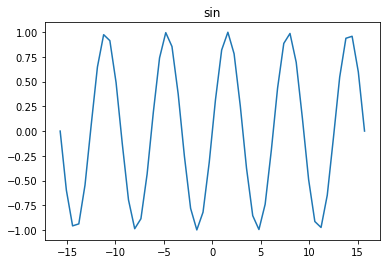

In [17]:
display(form)

### Funkcije interactive i interact

Interaktivnost sa formularom je moguće ostvariti i korišćenjem funkcionalnosti `interactive`. U prethodnom primeru, očekivalo se da prvo odaberemo opcije formulara, a potom da klikom na dugme i prikažemo grafik. Funkcinalnost `interactive` omogućava da se interaktivno reaguje na svaku promenu svake komponente formulara. Demonstriraćemo to prvo kroz prikaz grafika kosinusne funkcije na intervalu $[-2\pi, 2\pi]$ sa odabranim brojem tačaka ekvidistantne mreže.

In [18]:
def show_cosine_plot(N):
    x = np.linspace(-2 * np.pi, 2 * np.pi, N)
    plt.plot(x, np.cos(x))
    plt.title('cos(x)')
    plt.show()

In [19]:
interactive_cosine_plot = interactive(show_cosine_plot, N=(0, 50))    

In [20]:
display(interactive_cosine_plot)

interactive(children=(IntSlider(value=25, description='N', max=50), Output()), _dom_classes=('widget-interact'…

Kao što možemo videti, sada se na svaku promenu vrednosti broja parametra `N` (broja tačaka ekvidistantne mreže), poziva funkcija za prikaz grafikona. Funkcija `interactive` očekuje ime funkcije koju treba izvršiti i parametre po kojima treba obezbediti interaktivnost.

Sada ćemo ovu vrstu interaktivnosti obezbediti za uvodni primer. Možemo primetiti da nije potrebno da eksplicitno očitamo vrednost kontrola svojstvom `value` prilikom navođenja argumenata funkcije `interactive`.

In [21]:
def show_plot_interactive(start, end, N, function_to_plot):
    if start > end:
        print('Proverite granice intervala!')
        return

    N = int(N)
    x = np.linspace(start, end, N)

    if function_to_plot == 'sin':
        y = np.sin(x)
    else:
        y = np.cos(x)

    plt.clf()
    plt.plot(x, y)
    plt.title(function_to_plot)

In [22]:
form_interactive = interactive(show_plot_interactive, start=start_point, end=end_point, N=number_of_points, function_to_plot=function_to_plot)

In [23]:
display(form_interactive)

interactive(children=(FloatSlider(value=-15.707963267948966, description='Početak: ', max=15.707963267948966, …

Uz funkciju `interactive`, može se koristiti i funkcija `interact`. Razlike između ovih dveju funkcija su suptilne i tiču se povratnih vrednosti funkcija (funkcija `iteractive` vraća komponentu koja se može koristiti više puta, a funkcija `interact` odmah kreira GUI) i načinom kontrole ispisa unutar funkcija.

## Pregledanje skupova podataka uz pomoć komponenti

Često se skupovi podataka sa kojima radimo karakterišu velikim brojem vrsta i kolona. Ukoliko je potrebno da izvršimo komparativnu analizu za neke skupove vrednosti, opcije koje imamo su ili da čuvamo ispise većeg broja poziva podesnih funkcija ili da kreiramo veći broj svesaka i tako poredimo rezultate. Ograničenja koja oba ova pristupa nose se mogu prevazići kreiranjem interaktivnih formulara za pregled podataka sa opcijama koje se tiču samih skupova podataka. U primeru koji sledi omogućićemo interaktivno pregledanje podataka o poslodavcima i njihovim licencama za rad. Podaci se nalaze u datoteci `data/licenses.csv`.

Prvo ćemo učitati podatke i izvršiti elementarnu analizu.

In [24]:
data = pd.read_csv('data/licenses.csv')

In [25]:
data.shape

(1000, 39)

In [26]:
data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Historical Wards 2003-2015,Zip Codes,Census Tracts,Wards
0,2215438-20201216,2755898,375289,1,DE LA TORRE AUTO SALES INC.,DE LA TORRE AUTO SALES INC.,7120-7124 S HALSTED ST,CHICAGO,IL,60621,...,NaN,NaN,41.764545,-87.644542,"(41.76454490870721, -87.6445418133858)",66.0,31.0,21559.0,512.0,32.0
1,2631946-20201116,2753069,432735,1,SITEL ARM CORP.,SITEL ARM CORP.,600 BRICKELL AVE. 3200,MIAMI,FL,33131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2601093-20200616,2727894,427963,1,"Energy Resource Specialist, Inc",Energy Resource Roofing,1013 N FIRST ST,CHILLICOTHE,IL,61523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1478387-20201116,2751161,273724,1,"CTA FOODS, INC.",MUNICIPAL FOODS,2559 W DIVISION ST,CHICAGO,IL,60622,...,NaN,NaN,41.902859,-87.691889,"(41.90285923421055, -87.69188858431286)",25.0,10.0,21560.0,542.0,49.0
4,2627621-20201216,2756784,431942,1,CENVEO WORLDWIDE LIMITED,CENVEO WORLDWIDE LIMITED,3001 N ROCKWELL ST,CHICAGO,IL,60618,...,NaN,NaN,41.935845,-87.692696,"(41.93584538238736, -87.69269599838543)",22.0,24.0,21538.0,467.0,20.0


Kao što možemo videti, ovo je nešto veći skup podataka, sa 1000 vrsta i 39 kolona.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 1000 non-null   object 
 1   LICENSE ID                         1000 non-null   int64  
 2   ACCOUNT NUMBER                     1000 non-null   int64  
 3   SITE NUMBER                        1000 non-null   int64  
 4   LEGAL NAME                         1000 non-null   object 
 5   DOING BUSINESS AS NAME             999 non-null    object 
 6   ADDRESS                            1000 non-null   object 
 7   CITY                               1000 non-null   object 
 8   STATE                              1000 non-null   object 
 9   ZIP CODE                           1000 non-null   int64  
 10  WARD                               957 non-null    float64
 11  PRECINCT                           739 non-null    float6

Dalje, možemo eliminisati kolone u kojima se nalaze primarno NaN vrednosti. Iz izveštaja funkcije `info` vidimo da takvih kolona ima ukupno 3. 

In [28]:
data.drop(columns=['APPLICATION CREATED DATE', 'LICENSE STATUS CHANGE DATE', 'SSA'], inplace=True)

In [29]:
data.shape

(1000, 36)

Funkciju `isna` možemo iskoristi za proveru preostalih nedostajućih vrednosti. Za slučaj da je neophodno, vrste sa nedostajućim vrednostima možemo obrisati korišćenjem funkcije `dropna`. 

In [30]:
data.isna().sum()

ID                                     0
LICENSE ID                             0
ACCOUNT NUMBER                         0
SITE NUMBER                            0
LEGAL NAME                             0
DOING BUSINESS AS NAME                 1
ADDRESS                                0
CITY                                   0
STATE                                  0
ZIP CODE                               0
WARD                                  43
PRECINCT                             261
WARD PRECINCT                         43
POLICE DISTRICT                      257
LICENSE CODE                           0
LICENSE DESCRIPTION                    0
BUSINESS ACTIVITY ID                 147
BUSINESS ACTIVITY                    147
LICENSE NUMBER                         0
APPLICATION TYPE                       0
APPLICATION REQUIREMENTS COMPLETE      0
PAYMENT DATE                           2
CONDITIONAL APPROVAL                   0
LICENSE TERM START DATE                0
LICENSE TERM EXP

In [31]:
# data.dropna(axis=0, how='any', inplace=True)

Dodatno ćemo redukovati broj zanimljivih vrsta skupa podataka tako što ćemo analizirati samo one regione (jedinstveno određene poštanskim tj. zip kodom) koji imaju barem 20 registrovanih licenciranih poslodavaca.

Prvo ćemo izdvojiti jedinstvene poštanske kodove i steći predstavu o njihovoj brojnosti. Funkcija `unique` izdvaja jedinstvene vrednosti odabrane kolone.

In [32]:
unique_zip_codes = data['ZIP CODE'].unique()

In [35]:
unique_zip_codes.shape

(96,)

Da bismo izdvojili željene poštanske kodove, iskoristićemo funkciju `groupby` biblioteke `pandas` koja će grupisati vrednosti vrsta po vrednostima poštanskih kodova, a potom i funkciju `count` koja će prebrojati koliko ima poslodavaca u svakoj od grupa. Vrednosti ćemo na kraju sortirati korišćenjem funkcije `sort_values` u opadajućem poretku (za izor poretka sortiranja koristi se parametar `ascending` čija vrednost može biti `True` ili `False`). 

In [36]:
zip_codes = data.groupby('ZIP CODE').count()['ID'].sort_values(ascending=False)

In [37]:
len(zip_codes)

96

In [38]:
zip_codes.head(15)

ZIP CODE
60618    126
60639    105
60622     66
60609     42
60649     33
60655     31
60647     26
60608     25
60614     23
60619     21
60646     19
60623     18
60607     18
60616     18
60625     17
Name: ID, dtype: int64

Potom ćemo izdvojiti regione sa željenim svojstvom tj. one koji imaju više od 20 licenciranih poslodavaca. Iz ispisa funkcije `head` vidimo da postoji svega nekoliko takvih regiona.

In [41]:
zip_codes = list(zip_codes[zip_codes > 20].index)

In [42]:
zip_codes

[60618, 60639, 60622, 60609, 60649, 60655, 60647, 60608, 60614, 60619]

Za jedan konkretan poštanski broj želimo da korisnik ima mogućnost da kreira izveštaj tako što odabere kolonu po kojoj želi da sortira izveštaj i sam poredak sortiranja, a zatim da redukuje broj kolona po kojima želi da pregleda izveštaj. Na primer, za poštanski kod 60608, kolonu za uređivanje rezultata (u opadajućem poretku) koja označava datum isteka licence i kolone koji se odnose na ime, adresu i datum isteka licence poslodavca upit će izgledati ovako:

In [43]:
zip_code = 60608

In [44]:
data[data['ZIP CODE'] == zip_code].sort_values(
    by='LICENSE TERM EXPIRATION DATE',
    ascending=False)[['LEGAL NAME', 'ADDRESS', 'LICENSE TERM EXPIRATION DATE']]

,LEGAL NAME,ADDRESS,LICENSE TERM EXPIRATION DATE
961,"BEST TASTE GROUP, LLC",1723 S ASHLAND AVE,12/15/2022
724,ARA SALON LLC,1825 S ASHLAND AVE 1,12/15/2022
837,THE GIANT PENNY WHISTLE LLC,1854-1856 S BLUE ISLAND AVE 1,12/15/2022
848,THE GIANT PENNY WHISTLE LLC,1854-1856 S BLUE ISLAND AVE 1,12/15/2022
631,MERAKI CREATIONS LLC,1111 W 14TH PL 320,12/15/2022
157,SHIVAADI CORPORATION,3303 S HALSTED ST,12/15/2022
564,CONCIERGE AFS CO.,1001 W 15TH ST 139,12/15/2022
503,"BLACK HAIRSPRAY INC.,",2444 W 16TH ST 1E,12/15/2022
461,"ASSASSIN INK, INC.",2135 S WESTERN AVE 1ST,12/15/2022
272,HECTOR PRODUCE CORP.,2525 S BLUE ISLAND AVE 1ST 104,12/15/2022


Sada ćemo kreirati formular koji će sadržati sve neophodne kontrole. Postojaće lista za izbor poštanskog broja, kolona po kojoj treba urediti prikaz, dugme za štrikliranje za odabir poretka sortiranja i lista sa višestrukim izborom za odabir kolona koje treba da se nađu u rezultujućem izveštaju.

In [45]:
zips_dropdown = widgets.Dropdown(options=zip_codes,
                                 value=zip_codes[0],
                                 description='Zip kod:',
                                 disabled=False)

In [46]:
display(zips_dropdown)

Dropdown(description='Zip kod:', options=(60618, 60639, 60622, 60609, 60649, 60655, 60647, 60608, 60614, 60619…

Za očitavanje imena kolona koristićemo svojstvo `columns`.

In [47]:
columns_dropdown = widgets.Dropdown(options=data.columns,
                                    value=data.columns[4],
                                    description='Uredi po:',
                                    disabled=False)

In [48]:
display(columns_dropdown)

Dropdown(description='Uredi po:', index=4, options=('ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGA…

Dugmad za štrikliranje se kreiraju korišćenjem `Checkbox` komponente. Atribut `value` ima logičku vrednost True ili False i ukazuje na odabir kontrole.

In [49]:
sort_checkbox = widgets.Checkbox(value=False,
                                 description='Rastuće',
                                 disabled=False)

In [50]:
display(sort_checkbox)

Checkbox(value=False, description='Rastuće')

Lista sa višestrukim izborom se može kreirati korišćenjem komponente `SelectMultiple`. Raspoložive opcije se zadaju preko argumenta `options`, broj vidljivih opcija preko argumenta `rows`, a početno odabrane opcije argumentom `value`. Kako može biti odabrano više opcija, vrednost argumenta `value` je lista. 

In [51]:
columns_selectmultiple = widgets.SelectMultiple(options=data.columns,
                                                value=['LEGAL NAME'],
                                                rows=10,
                                                description='Podaci:',
                                                disabled=False)

In [52]:
display(columns_selectmultiple)

SelectMultiple(description='Podaci:', index=(4,), options=('ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER'…

Pripremićemo i prostor za prikaz rezultujućeg izveštaja korišćenjem specijalne komponente `Output`.

In [53]:
report_output = widgets.Output()

In [54]:
display(report_output)

Output()

Prilikom promena odabira opcija pozivaćemo funkciju za filtriranje prikaza `create_report`. U funkciji ćemo prvo izdvojiti podatke o poslodavcima sa traženim poštanskim kodom, potom ćemo sortirati vrednosti prema odabranoj koloni i poretku, a potom i izdvojiti kolone za prikaz. Ovako dobijene podatke ćemo prikazati u polju predviđenom za prikaz izveštaja. 

In [55]:
def create_report(zip_code, sort_column, sort_ascending, view_columns):
    filtered = data[data['ZIP CODE'] == zip_code].sort_values(
        by=sort_column, ascending=sort_ascending)[list(view_columns)]
    with report_output:
        report_output.clear_output()
        display(filtered)

Interaktivni formular ćemo dobiti korišćenjem funkcije `interactive` za funkciju `create_report` i njene argumente.

In [56]:
interactive(create_report,
            zip_code=zips_dropdown,
            sort_column=columns_dropdown,
            sort_ascending=sort_checkbox,
            view_columns=columns_selectmultiple)

interactive(children=(Dropdown(description='Zip kod:', index=2, options=(60618, 60639, 60622, 60609, 60649, 60…

Obratite pažnju da će se nakon prikaza ovog interaktivnog formulara izlaz pojaviti na mesto komponente `Output`.

Pored komponenti koje smo uveli u ovoj svesci postoje još mnoge druge zanimljive komponente poput komponenti za izbor datuma, boja, praćenje progresa, unos kraćih i dužih tekstualnih sadržaja i slično. Korišćenjem pomenutih vidžita za uređivanje rasporeda kontrola i pridruživanjem CSS stilova mogu se dobiti vrlo dopadljivi formulari. Više o svemu ovome se može pročitati u [zvaničnoj dokumentaciji](https://ipywidgets.readthedocs.io/en/latest/index.html).